In [1]:
import sys

sys.path.append('/home/leila/gpcr/ga/analysis/clustering_cb1')

from all_imports import *
from clustering import cluster_plot_, KMeans_clustering,clusters_statistics 

''' Author: Rezvan (Leila) Chitsazi '''

' Author: Rezvan (Leila) Chitsazi '

In [ ]:
def KMeans_clustering(cluster, nframe, Lig_1, Lig_2):
    
    ''' KMeans clustering '''
    
    repeat = str(nframe) + '_TMs_'
    
    data = pd.read_csv('data_2d.csv', delimiter=',', header=None)
    X = pd.DataFrame(data).to_numpy()
    print(X.shape)
    print('')
    
    random_state = None
    init = 'random'

    kmeans = KMeans(n_clusters=cluster, init = 'random', random_state=random_state,max_iter=600, tol=0.0001)
    kmeans.fit(X)
    kmeans_pred = kmeans.predict(X)

    centers = kmeans.cluster_centers_
    labels = kmeans.labels_


    print('number of clusters is:', len(centers))
    print('number of rows belong to each cluster')

    frame = pd.DataFrame(X)
    frame['cluster'] = kmeans_pred
    frame['cluster'].value_counts()
    
    print('--------------------------------------')
    
    ''' Visualization '''
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
    plt.style.use('seaborn')

    ax1.set_title("Original")
    ax1.scatter(X[:,0],X[:,3],c=X[1],cmap='brg', edgecolor=('k'))

    ax2.set_title('K_Means')
    ax2.scatter(X[:,0],X[:,3],c=kmeans.labels_,cmap='brg', edgecolor=('k'));
    
    print('-------------------------------------------------------------------------------------------')
    
    ''' Save indices for each cluster '''
    
    mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
    print(mydict)

    for i in range(cluster):
        indices = list(mydict[i])
        indices_array = np.array(indices)
        np.savetxt('clust_km_'+ str(repeat) + str(i) + '.csv', indices_array.astype(int), fmt='%i')
        
    print('--------------------------------------------------------------------------------------------')   
   
    ''' distnaces within/between clusters &
        save the output in (mat_all_all_' + str(nframe) + '_TMs.csv) for
        plotting '''

    idx_ = []

    for i in range(cluster):

        idx=np.where(kmeans.labels_ == i)[0]
        idx_.append(idx)
    
    print('inter/intra')    
    print('cluster to cluster : start')
    print('')

    c1 = []
    for i in range(len(idx_)):
        c0 = []
        for j in range(len(idx_)):
            xx = np.mean(X[np.ix_(idx_[i], idx_[j])])
            print(i, j, xx)
            c0.append(xx)
        c1.append(c0)
    c1 = np.array(c1)                         
    np.savetxt('mat_all_all_' + str(nframe) + '_TMs.csv',c1.astype(float), fmt='%2.3f')
    print('')       
    print('cluster to cluster: finish')
    
    print('----------------------------------------------------')
    
   
    ''' representative clusters '''
    
    ii_ = []
    for i in range(cluster):

        ii=list(idx_[i][centers[i][idx_[i]]==min(centers[i][idx_[i]])])
        ii_.append(ii)

    print('cluster to the representative cluster: start')
    print('')

    for i in range(len(ii_)):
        for j in range(len(idx_)):
            print(np.mean(X[np.ix_(idx_[j], ii_[i])]))

    print('')
    print('cluster to the representative cluster: finish');
    
    print('-----------------------------------------------------')
    
    ''' save representative indices from each cluster
        for Pymol visualization (not fully automated, in progress)'''
    
    idx0=np.where(kmeans.labels_ == 0)[0]
    idx1=np.where(kmeans.labels_ == 1)[0]
    idx2=np.where(kmeans.labels_ == 2)[0]

    idx0_topN_Lig1=[]
    idx0_topN_Lig2=[]

    for i in range(0,100):
    
        index=list(idx0[centers[0][idx0]==(np.sort(centers[0][idx0])[i])])[0]
        if index < nframe:
            idx0_topN_Lig1.append(index)
        else:
            idx0_topN_Lig2.append(index)
            
    print('clust_1')
    L1_1 = np.unique(idx0_topN_Lig1[0:10])
    L2_1 = np.unique(idx0_topN_Lig2[0:10])
    print(Lig_1, L1_1)
    print(Lig_2, L2_1)
    np.savetxt(Lig_1 + '_rep_' + 'clust1.csv', L1_1.astype(int), fmt='%i')
    np.savetxt(Lig_2 + '_rep_' + 'clust1.csv', L2_1.astype(int), fmt='%i')
    #print(Lig_1, np.unique(idx0_topN_Lig1[0:10]))
    #print(Lig_2, np.unique(idx0_topN_Lig2[0:10]))
    print('')
    #---------------------------------------------
    idx1_topN_Lig1=[]
    idx1_topN_Lig2=[]

    for i in range(0,100):
    
        index=list(idx1[centers[1][idx1]==(np.sort(centers[1][idx1])[i])])[0]
        if index < nframe:
            idx1_topN_Lig1.append(index)
        else:
            idx1_topN_Lig2.append(index)
            
    print('clust_2')
    L1_2 = np.unique(idx1_topN_Lig1[0:10])
    L2_2 = np.unique(idx1_topN_Lig2[0:10])
    print(Lig_1, L1_2)
    print(Lig_2, L2_2)
    np.savetxt(Lig_1 + '_rep_' + 'clust2.csv', L1_2.astype(int), fmt='%i')
    np.savetxt(Lig_2 + '_rep_' + 'clust2.csv', L2_2.astype(int), fmt='%i')
    #print(Lig_1, np.unique(idx1_topN_Lig1[0:10]))
    #print(Lig_2, np.unique(idx1_topN_Lig2[0:10]))
    print('')
    #-------------------------------------------------------------
    idx2_topN_Lig1=[]
    idx2_topN_Lig2=[]
    for i in range(0,100):
        index=list(idx2[centers[2][idx2]==(np.sort(centers[2][idx2])[i])])[0]
        if index < nframe:
            idx2_topN_Lig1.append(index)
        else:
            idx2_topN_Lig2.append(index)
            
    print('clust_3')  
    L1_3 = np.unique(idx2_topN_Lig1[0:10])
    L2_3 = np.unique(idx2_topN_Lig2[0:10])
    print(Lig_1, L1_3)
    print(Lig_2, L2_3)
    np.savetxt(Lig_1 + '_rep_' + 'clust3.csv', L1_3.astype(int), fmt='%i')
    np.savetxt(Lig_2 + '_rep_' + 'clust3.csv', L2_3.astype(int), fmt='%i')
    #print(Lig_1, np.unique(idx2_topN_Lig1[0:10]))
    #print(Lig_2, np.unique(idx2_topN_Lig2[0:10]))

In [ ]:
def clusters_statistics(nframe, Lig_1, Lig_2):
    files = sorted(glob.glob('clust_km_'+ str(nframe) + '*.csv'))
    print(files)        

    count = 0

    for file in range(len(files)):
        print('------------------------------------------------------------------------------------------')
        print(files[file])
        df = pd.read_csv(files[file], header=None)
        df = df.values.tolist()
        idx_ = [x[0] for x  in df]
    
    
        k = nframe
        repeat = str(nframe) + '_TMs_'
        
        k1_lst = []
        k2_lst = []
    
        count_k1 = 0
        count_k2 = 0
    
    
        for i in idx_ :
            if i > k :
            
                k1_lst.append(i)
                count_k1 = count_k1 + 1
            else :
            
                k2_lst.append(i)
                count_k2 = count_k2 +1
            
        count = count + 1 
    
        percent_k1 = (count_k1/len(idx_))*100
        percent_k2 = (count_k2/len(idx_))*100
    
        _k1_frame = (count_k1/nframe)*100
        _k2_frame = (count_k2/nframe)*100
    
        print('Total frames in cluster:', len(idx_))
        print(Lig_2 + ' frames in cluster:', count_k1, '-----',str(percent_k1) + '% of cluster total frames')
        print(Lig_1 + ' frames in cluster:', count_k2, '-----',str(percent_k2) + '% of cluster total frames')
        print('')
        print(Lig_2 + ' frames in cluster:', str(_k1_frame) + '% of total frames for RMSD, ' + str(nframe))
        print(Lig_1 + ' frames in cluster:', str(_k2_frame) + '% of total frames for RMSD, ' + str(nframe))
        print('')
    

        k1_lst=np.array(k1_lst)
        np.savetxt(Lig_2 + '_clust_' + str(repeat) +  str(count) + '.csv', k1_lst.astype(int), fmt='%i')
    
        k2_lst=np.array(k2_lst)
        np.savetxt(Lig_1 + '_clust_' + str(repeat) +  str(count) + '.csv', k2_lst.astype(int), fmt='%i')
        print('') 

(5500, 5500)

number of clusters is: 3
number of rows belong to each cluster
--------------------------------------
-------------------------------------------------------------------------------------------
{0: array([   4,    5,    7, ..., 5490, 5492, 5499]), 1: array([   1,    3,    6, ..., 5493, 5494, 5498]), 2: array([   0,    2,    9, ..., 5495, 5496, 5497])}
--------------------------------------------------------------------------------------------
inter/intra
cluster to cluster : start

0 0 1.4221033676290833
0 1 1.8748750821706497
0 2 2.033164964093964
1 0 1.8748747915885742
1 1 1.4878907194220667
1 2 1.8947282846544027
2 0 2.0331649589273155
2 1 1.8947287345129522
2 2 1.3842045520010502

cluster to cluster: finish
----------------------------------------------------
cluster to the representative cluster: start

1.2182259230547445
1.791878059900948
1.8793190215085003
1.7943425983238321
1.2308197577470674
1.8282063497079386
1.8807755674925926
1.79138286481564
1.156287059196838

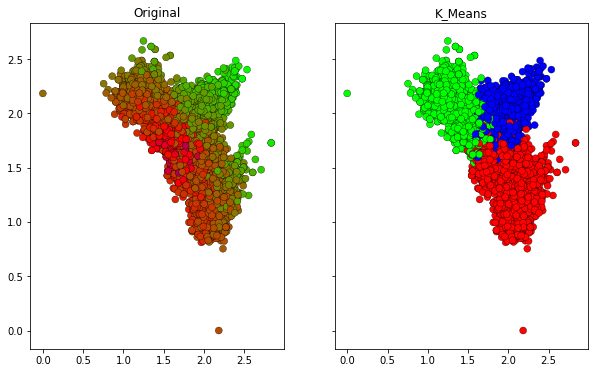

In [2]:
""" 
Variables

pick the number of cluster based on elbow point/gap statistic 

"""
cluster = 3
nframe = 10000

KMeans_clustering(cluster, nframe,'mdmb','mmb')
print('')
print('KMeans_Clustering DONE')
print('-------------------------------------------')

Matrix Plot

(3, 3)
[[1.422 1.875 2.033]
 [1.875 1.488 1.895]
 [2.033 1.895 1.384]]


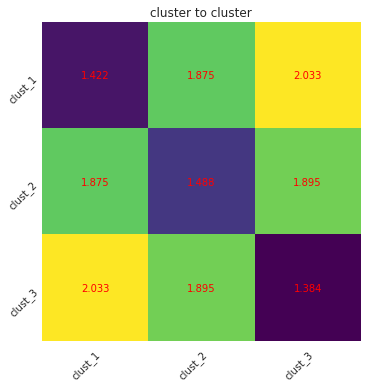


Clusters Statistics

['clust_km_10000_TMs_0.csv', 'clust_km_10000_TMs_1.csv', 'clust_km_10000_TMs_2.csv']
------------------------------------------------------------------------------------------
clust_km_10000_TMs_0.csv
Total frames in cluster: 1871
mmb frames in cluster: 0 ----- 0.0% of cluster total frames
mdmb frames in cluster: 1871 ----- 100.0% of cluster total frames

mmb frames in cluster: 0.0% of total frames for RMSD, 10000
mdmb frames in cluster: 18.709999999999997% of total frames for RMSD, 10000


------------------------------------------------------------------------------------------
clust_km_10000_TMs_1.csv
Total frames in cluster: 1964
mmb frames in cluster: 0 ----- 0.0% of cluster total frames
mdmb frames in cluster: 1964 ----- 100.0% of cluster total frames

mmb frames in cluster: 0.0% of total frames for RMSD, 10000
mdmb frames in cluster: 19.64% of total frames for RMSD, 10000


------------------------------------------------------------------------------------

In [3]:
print('Matrix Plot')
print('')
cluster_plot_('mat_all_all_' + str(nframe) + '_TMs',cluster)
print('')
print('Clusters Statistics')
print('')
clusters_statistics(nframe, 'mdmb','mmb')